.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

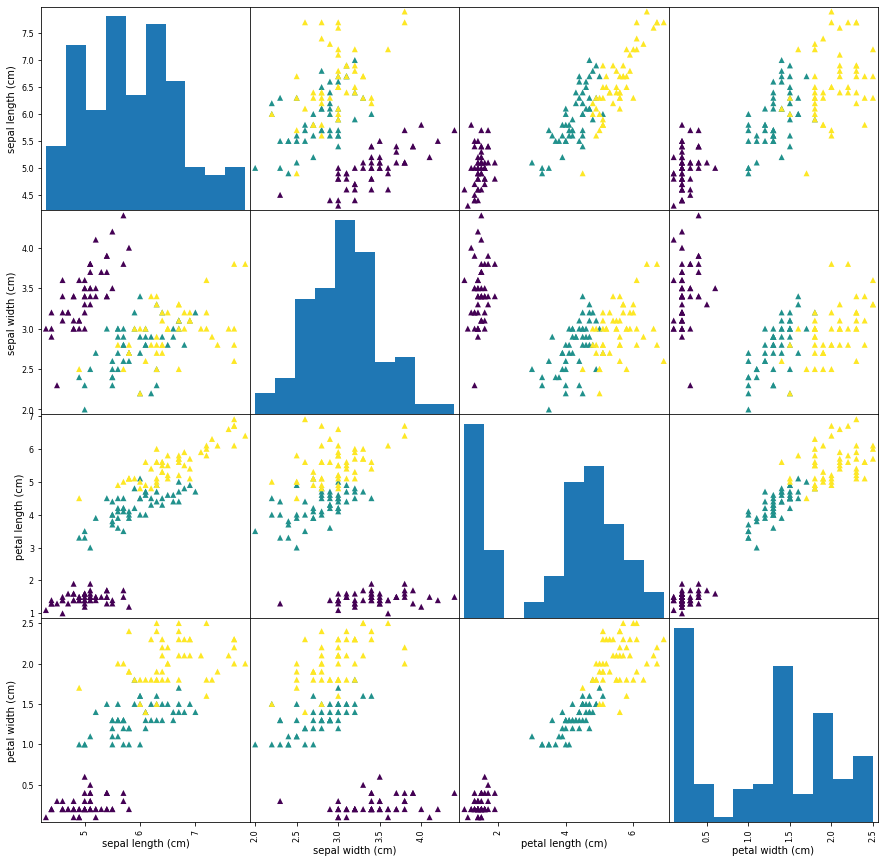

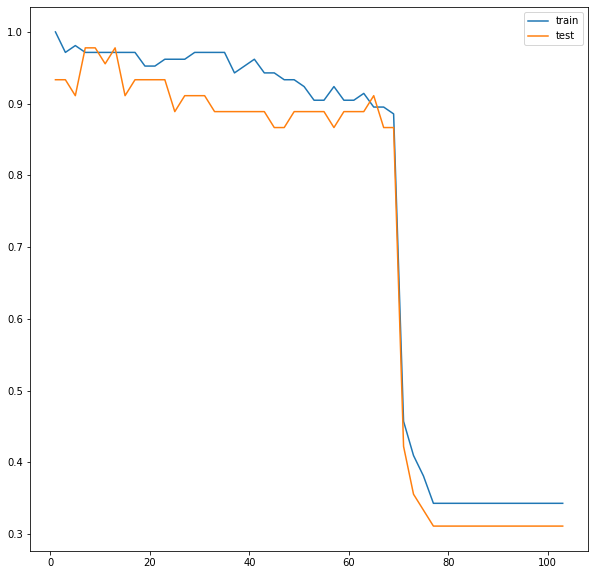

In [6]:
# 붓꽃의 꽃잎 길이, 꽃잎 너비, 길이, 꽃받침 너비 특징을 활용해 3가지 품종을 분류해보자.
# KNN 모델의 이웃의 숫자를 조절

from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

iris_data = load_iris()
iris_data

iris_data.keys()

iris_data['data']

iris_data['target']

iris_data['target_names']

print(iris_data['DESCR'])

iris_data['feature_names']

# 문제와 답 분리
# 훈련세트와 평가세트 분리

iris_df = pd.DataFrame(iris_data['data'], columns=iris_data['feature_names'])
iris_df.head(8)

X = iris_df
y = iris_data['target']

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state = 65)
X_train

# EDA

pd.plotting.scatter_matrix(iris_df, figsize=(15,15), marker='^', c=y, alpha = 1)

# 모델링

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
pre = model.predict(X_test)
metrics.accuracy_score(pre, y_test)
model.score(X_test,y_test)

# 하이퍼파라미터 튜닝

test_list = []
train_list = []
for k in range(1,105,2):
    m = KNeighborsClassifier(n_neighbors=k)
    m.fit(X_train, y_train)
    
    test_pre = m.predict(X_test)
    test_score = metrics.accuracy_score(test_pre,y_test)
    test_list.append(test_score)
    
    train_pre = m.predict(X_train)
    train_score = metrics.accuracy_score(train_pre,y_train)
    train_list.append(train_score)
    # print(k,":",test_score)
    
plt.figure(figsize=(10,10))
plt.plot(range(1,105,2), train_list, label='train')
plt.plot(range(1,105,2), test_list, label='test')
plt.legend()
plt.show()